# Modelling Tyre Deg with Regression, then predicting Laptimes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


We need to decide when a tyre is unusable via the throttle vs. speed or brakes vs. speed, RPM vs. throttle

Let's look at what the comparision is like when the tyre is new

In [3]:
laptimes = pd.read_csv('training_data_for_tire_deg/laptimes_data.csv')
telemetry = pd.read_csv('training_data_for_tire_deg/telemetry_data.csv')
weather = pd.read_csv('training_data_for_tire_deg/weather_data.csv')

telemetry.head()

,Time,RPM,Speed,Throttle,Brake,Status
0,0 days 00:00:00,3707.310726,33.000000,0.000000,False,OnTrack
1,0 days 00:00:00.141000,3734.000000,33.000000,0.000000,False,OnTrack
2,0 days 00:00:00.305000,3760.422222,33.455556,2.277778,False,OnTrack
3,0 days 00:00:00.501000,3792.000000,34.000000,5.000000,False,OnTrack
4,0 days 00:00:00.585000,3930.075000,35.050000,5.000000,False,OnTrack


In [4]:
telemetry.loc[telemetry['Throttle'] != 0.0]

,Time,RPM,Speed,Throttle,Brake,Status
2,0 days 00:00:00.305000,3760.422222,33.455556,2.277778,False,OnTrack
3,0 days 00:00:00.501000,3792.000000,34.000000,5.000000,False,OnTrack
4,0 days 00:00:00.585000,3930.075000,35.050000,5.000000,False,OnTrack
5,0 days 00:00:00.661000,4055.000000,36.000000,5.000000,False,OnTrack
6,0 days 00:00:00.745000,4219.220000,36.840000,5.840000,False,OnTrack
...,...,...,...,...,...,...
28475,0 days 00:01:16.922000,4730.512194,50.825002,10.174998,False,OnTrack
28476,0 days 00:01:16.936000,4697.000000,51.000000,10.000000,False,OnTrack
28477,0 days 00:01:17.341000,5125.932022,53.761365,25.647735,False,OnTrack
28478,0 days 00:01:17.376000,5163.000000,54.000000,27.000000,False,OnTrack


In [5]:
telemetry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28480 entries, 0 to 28479
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      28480 non-null  object 
 1   RPM       28480 non-null  float64
 2   Speed     28480 non-null  float64
 3   Throttle  28480 non-null  float64
 4   Brake     28480 non-null  bool   
 5   Status    28480 non-null  object 
dtypes: bool(1), float64(3), object(2)
memory usage: 1.1+ MB


We need to pick a fast lap from laptimes_data.csv and review telemetry

In [6]:
laptimes

,Time,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Compound,TyreLife,FreshTyre,LapStartTime,LapStartDate
0,0 days 00:14:41.485000,0 days 00:01:41.973000,1.0,1.0,0 days 00:13:00.703000,NaN,MEDIUM,1.0,True,0 days 00:13:00.703000,2024-05-24 11:30:52.936
1,0 days 00:16:01.681000,0 days 00:01:20.196000,2.0,1.0,NaN,NaN,MEDIUM,2.0,True,0 days 00:14:41.485000,2024-05-24 11:32:33.718
2,0 days 00:17:18.908000,0 days 00:01:17.227000,3.0,1.0,NaN,NaN,MEDIUM,3.0,True,0 days 00:16:01.681000,2024-05-24 11:33:53.914
3,0 days 00:18:44.851000,0 days 00:01:25.943000,4.0,1.0,NaN,NaN,MEDIUM,4.0,True,0 days 00:17:18.908000,2024-05-24 11:35:11.141
4,0 days 00:20:00.749000,0 days 00:01:15.898000,5.0,1.0,NaN,NaN,MEDIUM,5.0,True,0 days 00:18:44.851000,2024-05-24 11:36:37.084
5,0 days 00:21:33.871000,0 days 00:01:33.122000,6.0,1.0,NaN,NaN,MEDIUM,6.0,True,0 days 00:20:00.749000,2024-05-24 11:37:52.982
6,0 days 00:22:57.924000,0 days 00:01:24.053000,7.0,1.0,NaN,NaN,MEDIUM,7.0,True,0 days 00:21:33.871000,2024-05-24 11:39:26.104
7,0 days 00:24:13.190000,0 days 00:01:15.266000,8.0,1.0,NaN,NaN,MEDIUM,8.0,True,0 days 00:22:57.924000,2024-05-24 11:40:50.157
8,0 days 00:25:59.040000,0 days 00:01:45.850000,9.0,1.0,NaN,NaN,MEDIUM,9.0,True,0 days 00:24:13.190000,2024-05-24 11:42:05.423
9,0 days 00:27:13.380000,0 days 00:01:14.340000,10.0,1.0,NaN,NaN,MEDIUM,10.0,True,0 days 00:25:59.040000,2024-05-24 11:43:51.273


Lap number 5 seems fast

In [7]:
laptimes.loc[laptimes['LapNumber'] == 19.0, ['LapStartTime', 'Compound', 'TyreLife', 'FreshTyre', 'LapNumber']]

,LapStartTime,Compound,TyreLife,FreshTyre,LapNumber
18,0 days 00:46:26.209000,SOFT,2.0,True,19.0


In [8]:

import fastf1

session = fastf1.get_session(2024, 'Monaco', 'FP1')
session.load()

driver_laps = session.laps.pick_driver('TSU')
lap = driver_laps.pick_lap(19.0)
lap_3_telemetry = lap.get_telemetry()
lap_3_telemetry

req         WARNING 	DEFAULT CACHE ENABLED! (579.32 MB) C:\Users\chchr\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Monaco Grand Prix - Practice 1 [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '2', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '44', '55', '63', '77', '81']
c:\Users\chch

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2024-05-24 12:04:18.442,0 days 00:46:26.209000,,1692.635833,0 days 00:00:00,10621.754901,267.559997,6,100.0,False,12,interpolation,0.570615,0.000174,OnTrack,-7666.246344,-6560.984176,502.442426
3,2024-05-24 12:04:18.564,0 days 00:46:26.331000,,1692.635833,0 days 00:00:00.122000,10716.000000,270.000000,7,100.0,False,12,car,9.767778,0.002972,OnTrack,-7670.405957,-6485.884347,502.881955
4,2024-05-24 12:04:18.615,0 days 00:46:26.382000,,1692.635833,0 days 00:00:00.173000,10740.225030,270.765001,7,100.0,False,12,pos,13.624760,0.004146,OnTrack,-7672.000000,-6444.000000,503.000000
5,2024-05-24 12:04:18.764,0 days 00:46:26.531000,3,1692.635833,0 days 00:00:00.322000,10811.000000,273.000000,7,100.0,False,12,car,24.934444,0.007587,OnTrack,-7676.147542,-6286.539042,503.123494
6,2024-05-24 12:04:18.895,0 days 00:46:26.662000,3,1692.053611,0 days 00:00:00.453000,10884.141702,274.091667,7,100.0,False,12,pos,34.928290,0.010628,OnTrack,-7677.000000,-6140.000000,503.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,2024-05-24 12:05:46.295,0 days 00:47:54.062000,2,83.853607,0 days 00:01:27.853000,11313.937360,259.421876,6,100.0,False,12,pos,3242.629760,0.986708,OnTrack,-7643.000000,-6904.000000,502.000000
658,2024-05-24 12:05:46.524,0 days 00:47:54.291000,2,67.378333,0 days 00:01:28.082000,10813.000000,263.000000,6,100.0,False,12,car,3259.411111,0.991815,OnTrack,-7654.150832,-6764.035400,501.828148
659,2024-05-24 12:05:46.756,0 days 00:47:54.523000,2,67.378333,0 days 00:01:28.314000,10702.800000,266.866667,6,100.0,False,12,pos,3276.674058,0.997068,OnTrack,-7661.000000,-6641.000000,502.000000
660,2024-05-24 12:05:46.815,0 days 00:47:54.582000,2,67.378333,0 days 00:01:28.373000,10674.774970,267.850001,6,100.0,False,12,pos,3281.106188,0.998416,OnTrack,-7663.000000,-6597.000000,502.000000


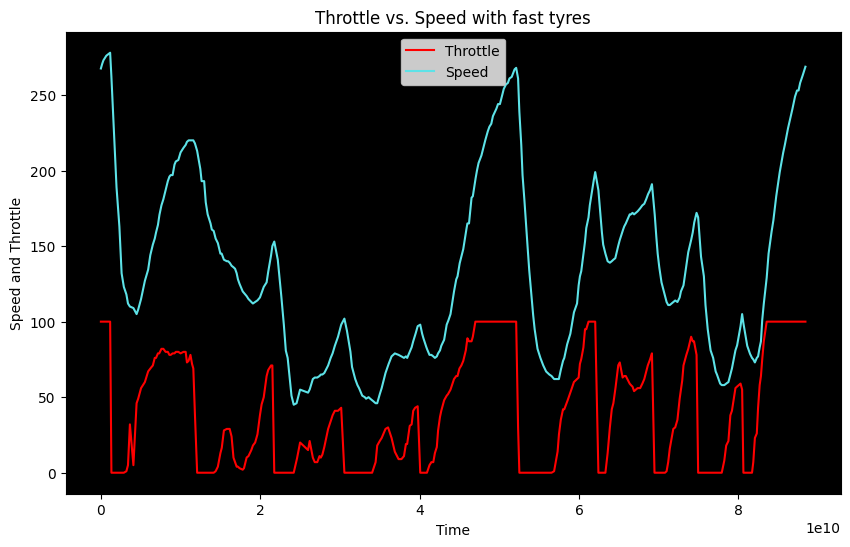

In [9]:
# graph for lap 4 (fast lap)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(lap_3_telemetry['Time'], lap_3_telemetry['Throttle'], color='red')
ax.plot(lap_3_telemetry['Time'], lap_3_telemetry['Speed'], color='#5DE2E7')
ax.set_facecolor('black')
ax.set_xlabel('Time')
ax.set_ylabel('Speed and Throttle')
ax.set_title('Throttle vs. Speed with fast tyres')
ax.legend(labels=['Throttle', 'Speed'])
plt.savefig('plots/throttle_speed.png')

c:\Users\chchr\Python Projects\F1 Project\.venv\Lib\site-packages\fastf1\core.py:3021: FutureWarning: pick_lap is deprecated and will be removed in a future release. Use pick_laps instead.
  warnings.warn(("pick_lap is deprecated and will be removed in a "


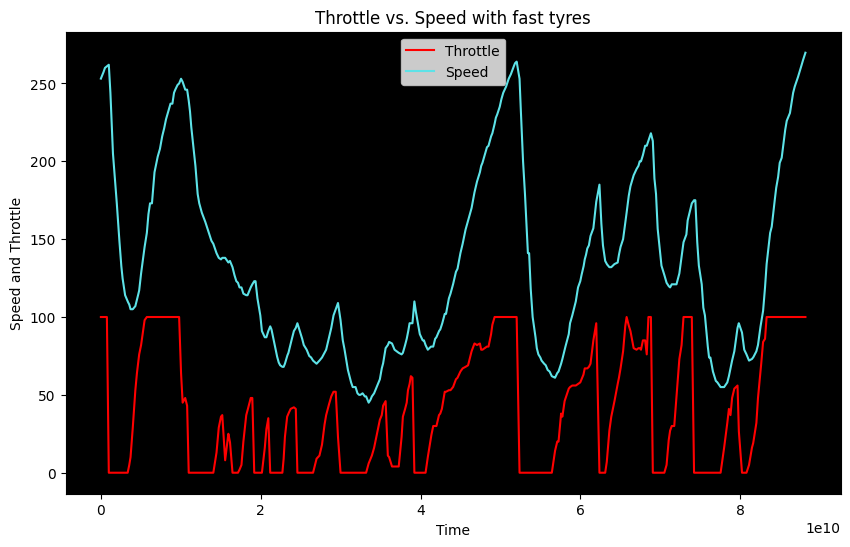

In [10]:
# Now for the telemetry of the of a fast lap with slower tyres
# lap 17 was also on mediums and laptime was a bit slower

lap_13 = driver_laps.pick_lap(30.0)
lap_13_telemetry = lap_13.get_telemetry()

# graph for lap 4 (fast lap)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(lap_13_telemetry['Time'], lap_13_telemetry['Throttle'], color='red')
ax.plot(lap_13_telemetry['Time'], lap_13_telemetry['Speed'], color='#5DE2E7')
ax.set_facecolor('black')
ax.set_xlabel('Time')
ax.set_ylabel('Speed and Throttle')
ax.set_title('Throttle vs. Speed with fast tyres')
ax.legend(labels=['Throttle', 'Speed'])
plt.savefig('plots/throttle_speed.png')

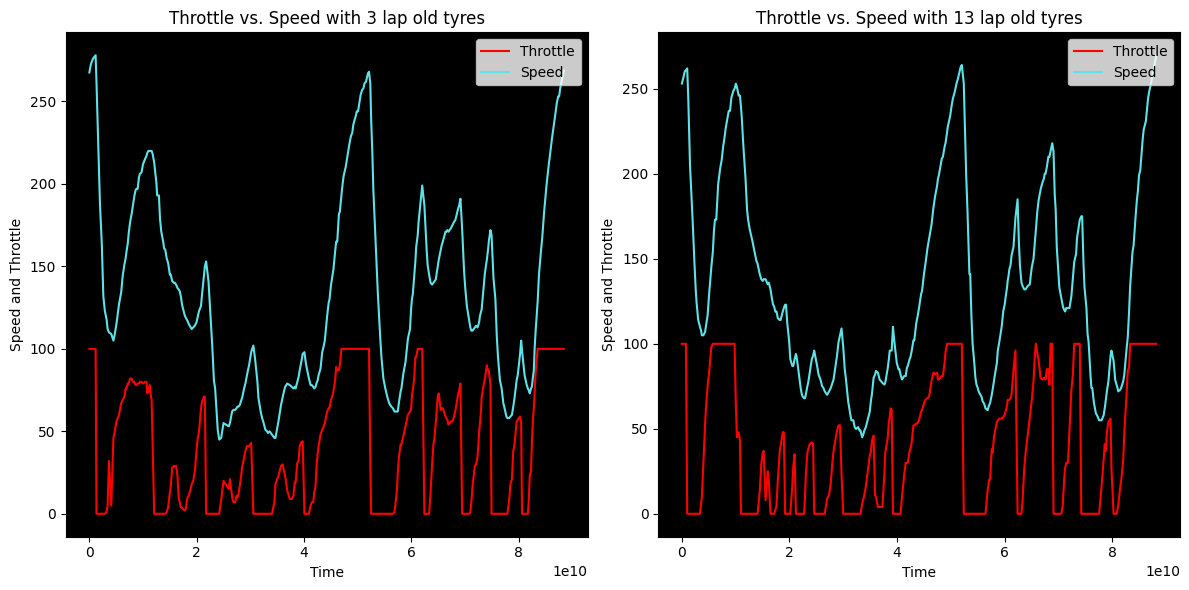

In [11]:
# side by side:

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(lap_3_telemetry['Time'], lap_3_telemetry['Throttle'], color='red')
ax[0].plot(lap_3_telemetry['Time'], lap_3_telemetry['Speed'], color='#5DE2E7')
ax[0].set_facecolor('black')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Speed and Throttle')
ax[0].set_title('Throttle vs. Speed with 3 lap old tyres')
ax[0].legend(labels=['Throttle', 'Speed'])

ax[1].plot(lap_13_telemetry['Time'], lap_13_telemetry['Throttle'], color='red')
ax[1].plot(lap_13_telemetry['Time'], lap_13_telemetry['Speed'], color='#5DE2E7')
ax[1].set_facecolor('black')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Speed and Throttle')
ax[1].set_title('Throttle vs. Speed with 13 lap old tyres')
ax[1].legend(labels=['Throttle', 'Speed'])

plt.tight_layout()
plt.show()

In [12]:
# I will model a tire degradation metric, as 100% being brand new

print(
    lap_3_telemetry['Speed'].max(),
    lap_13_telemetry['Speed'].max()
)

278.0 269.7249989818182


In [13]:
# tyre life, max speed  lin regression
# Then this can correlate with a Boolean value if the tyre is usable, using logistic regression, using tyre life and max speed again

Get data from other practice sessions - P2 and P3 

In [14]:
free_practice_2 = fastf1.get_session(2024, 'Monaco', 'FP2')
free_practice_3 = fastf1.get_session(2024, 'Monaco', 'FP3')

free_practice_2.load()
free_practice_3.load()

p2_laps = free_practice_2.laps
p3_laps = free_practice_3.laps

core           INFO 	Loading data for Monaco Grand Prix - Practice 2 [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver  3: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '2', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '44', '55', '63', '77', '81']
core           INFO 	Loading da

In [15]:
p2_laps.info()

<class 'fastf1.core.Laps'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                676 non-null    timedelta64[ns]
 1   Driver              676 non-null    object         
 2   DriverNumber        676 non-null    object         
 3   LapTime             614 non-null    timedelta64[ns]
 4   LapNumber           676 non-null    float64        
 5   Stint               676 non-null    float64        
 6   PitOutTime          77 non-null     timedelta64[ns]
 7   PitInTime           77 non-null     timedelta64[ns]
 8   Sector1Time         675 non-null    timedelta64[ns]
 9   Sector2Time         675 non-null    timedelta64[ns]
 10  Sector3Time         616 non-null    timedelta64[ns]
 11  Sector1SessionTime  675 non-null    timedelta64[ns]
 12  Sector2SessionTime  675 non-null    timedelta64[ns]
 13  Sector3SessionTime  616 non-null    timedelta6

In [16]:
tsunoda_p2 = p2_laps.loc[p2_laps['Driver'] == 'TSU', ['Time', 'LapTime', 'LapNumber', 'Stint', 'Compound', 'TyreLife', ]]
tsunoda_p2.head()

,Time,LapTime,LapNumber,Stint,Compound,TyreLife
338,0 days 00:18:16.373000,0 days 00:01:48.132000,1.0,1.0,HARD,1.0
339,0 days 00:19:32.504000,0 days 00:01:16.131000,2.0,1.0,HARD,2.0
340,0 days 00:20:46.816000,0 days 00:01:14.312000,3.0,1.0,HARD,3.0
341,0 days 00:22:24.829000,0 days 00:01:38.013000,4.0,1.0,HARD,4.0
342,0 days 00:23:38.998000,0 days 00:01:14.169000,5.0,1.0,HARD,5.0


In [17]:
lap_threshold = pd.Timedelta(minutes=1, seconds=20)  
slow_laps_p2 = tsunoda_p2.loc[tsunoda_p2['LapTime'] > lap_threshold]
tsunoda_p2 = tsunoda_p2.drop(list(slow_laps_p2.index), axis=0)
tsunoda_p2.head()

,Time,LapTime,LapNumber,Stint,Compound,TyreLife
339,0 days 00:19:32.504000,0 days 00:01:16.131000,2.0,1.0,HARD,2.0
340,0 days 00:20:46.816000,0 days 00:01:14.312000,3.0,1.0,HARD,3.0
342,0 days 00:23:38.998000,0 days 00:01:14.169000,5.0,1.0,HARD,5.0
344,0 days 00:26:27.909000,0 days 00:01:13.346000,7.0,1.0,HARD,7.0
346,0 days 00:29:24.329000,0 days 00:01:13.753000,9.0,1.0,HARD,9.0


In [18]:
# Drop all hard compound tires as he wasn't pushing every lap

hard_compound = tsunoda_p2.loc[tsunoda_p2['Compound'] == 'HARD']
tsunoda_p2 = tsunoda_p2.drop(list(hard_compound.index), axis=0)
tsunoda_p2

,Time,LapTime,LapNumber,Stint,Compound,TyreLife
352,0 days 00:43:21.950000,0 days 00:01:12.797000,15.0,2.0,MEDIUM,2.0
357,0 days 00:51:13.574000,0 days 00:01:12.349000,20.0,2.0,MEDIUM,7.0
360,0 days 00:55:55.691000,0 days 00:01:12.862000,23.0,2.0,MEDIUM,10.0
361,0 days 01:02:52.033000,NaT,24.0,2.0,MEDIUM,11.0
363,0 days 01:05:31.133000,0 days 00:01:16.606000,26.0,3.0,MEDIUM,13.0
364,0 days 01:06:47.735000,0 days 00:01:16.602000,27.0,3.0,MEDIUM,14.0
365,0 days 01:08:04.570000,0 days 00:01:16.835000,28.0,3.0,MEDIUM,15.0
366,0 days 01:09:20.895000,0 days 00:01:16.325000,29.0,3.0,MEDIUM,16.0
367,0 days 01:10:36.559000,0 days 00:01:15.664000,30.0,3.0,MEDIUM,17.0
368,0 days 01:11:52.428000,0 days 00:01:15.869000,31.0,3.0,MEDIUM,18.0


Now for Tsunoda's p3 times

In [19]:
tsunoda_p3 = p3_laps.loc[p3_laps['Driver'] == 'TSU', ['Time', 'LapTime', 'LapNumber', 'Stint', 'Compound', 'TyreLife', 'FreshTyre']]
lap_threshold_3 = pd.Timedelta(minutes=1, seconds=20)  
slow_laps_p3 = tsunoda_p3.loc[tsunoda_p3['LapTime'] > lap_threshold_3]
tsunoda_p3 = tsunoda_p3.drop(list(slow_laps_p3.index), axis=0)
tsunoda_p3.head()

,Time,LapTime,LapNumber,Stint,Compound,TyreLife,FreshTyre
257,0 days 00:29:47.927000,NaT,1.0,1.0,HARD,1.0,True
260,0 days 00:34:21.186000,0 days 00:01:14.171000,4.0,2.0,SOFT,3.0,True
263,0 days 00:39:06.281000,0 days 00:01:13.388000,7.0,2.0,SOFT,6.0,True
266,0 days 00:43:57.393000,0 days 00:01:12.526000,10.0,2.0,SOFT,9.0,True
269,0 days 00:48:53.943000,0 days 00:01:12.812000,13.0,2.0,SOFT,12.0,True


In [20]:
tsunoda_p3 = tsunoda_p3.dropna()
tsunoda_p2 = tsunoda_p2.dropna()
tsunoda_p3['session'] = 'FP3'
tsunoda_p2['session'] = 'FP2'


C:\Users\chchr\AppData\Local\Temp\ipykernel_25720\1654980750.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsunoda_p2['session'] = 'FP2'


In [21]:
# Concat to a big dataset

practice_times = pd.concat([tsunoda_p2, tsunoda_p3]).reset_index()
practice_times.head()

,index,Time,LapTime,LapNumber,Stint,Compound,TyreLife,session,FreshTyre
0,352,0 days 00:43:21.950000,0 days 00:01:12.797000,15.0,2.0,MEDIUM,2.0,FP2,NaN
1,357,0 days 00:51:13.574000,0 days 00:01:12.349000,20.0,2.0,MEDIUM,7.0,FP2,NaN
2,360,0 days 00:55:55.691000,0 days 00:01:12.862000,23.0,2.0,MEDIUM,10.0,FP2,NaN
3,363,0 days 01:05:31.133000,0 days 00:01:16.606000,26.0,3.0,MEDIUM,13.0,FP2,NaN
4,364,0 days 01:06:47.735000,0 days 00:01:16.602000,27.0,3.0,MEDIUM,14.0,FP2,NaN


#### Get Telemetry of each lap to find the max speed

In [22]:
p2_driver_laps = free_practice_2.laps.pick_driver('TSU')

# Practice 2 
lap_numbers_p2 = practice_times.loc[practice_times['session'] == 'FP2', ['LapNumber']]
lap_numbers_p2 = lap_numbers_p2['LapNumber'].tolist()

practice_2_telemetry = pd.DataFrame()

for lap_index, lap in p2_driver_laps.iterlaps():
    
    if lap['LapNumber'] in lap_numbers_p2:
        telemetry = lap.get_telemetry()
        telemetry['LapNumber'] = lap['LapNumber']
        practice_2_telemetry = pd.concat([practice_2_telemetry, telemetry])
 
    else:
        continue

c:\Users\chchr\Python Projects\F1 Project\.venv\Lib\site-packages\fastf1\core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


In [23]:
practice_2_telemetry.head()

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z,LapNumber
2,2024-05-24 15:27:19.097,0 days 00:42:09.153000,,315.920278,0 days 00:00:00,10634.410012,267.414999,6,100.0,False,12,interpolation,0.119792,0.000036,OnTrack,-7665.627539,-6582.689905,502.241982,15.0
3,2024-05-24 15:27:19.136,0 days 00:42:09.192000,,315.920278,0 days 00:00:00.039000,10627.000000,268.000000,7,100.0,False,12,car,3.037500,0.000922,OnTrack,-7667.740581,-6557.647359,502.379457,15.0
4,2024-05-24 15:27:19.296,0 days 00:42:09.352000,3,315.920278,0 days 00:00:00.199000,10690.000000,271.000000,7,100.0,False,12,car,15.081944,0.004577,OnTrack,-7674.724660,-6450.427281,502.802817,15.0
5,2024-05-24 15:27:19.456,0 days 00:42:09.512000,3,313.164722,0 days 00:00:00.359000,10831.600000,273.400000,7,100.0,False,12,pos,27.248933,0.008270,OnTrack,-7679.000000,-6336.000000,503.000000,15.0
6,2024-05-24 15:27:19.496,0 days 00:42:09.552000,3,312.475833,0 days 00:00:00.399000,10867.000000,274.000000,7,100.0,False,12,car,30.304167,0.009197,OnTrack,-7679.645594,-6306.267054,503.013955,15.0


In [24]:
practice_2_telemetry['LapNumber'].unique()

array([15., 20., 23., 26., 27., 28., 29., 30., 31., 32., 33., 34.])

Same for FP3

In [25]:
p3_driver_laps = free_practice_2.laps.pick_driver('TSU')

# Practice 3
lap_numbers_p3 = practice_times.loc[practice_times['session'] == 'FP3', ['LapNumber']]
lap_numbers_p3 = lap_numbers_p3['LapNumber'].tolist()

practice_3_telemetry = pd.DataFrame()

for lap_index, lap in p3_driver_laps.iterlaps():
    
    if lap['LapNumber'] in lap_numbers_p3:
        telemetry = lap.get_telemetry()
        telemetry['LapNumber'] = lap['LapNumber']
        practice_3_telemetry = pd.concat([practice_3_telemetry, telemetry])
 
    else:
        continue

c:\Users\chchr\Python Projects\F1 Project\.venv\Lib\site-packages\fastf1\core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


In [26]:
practice_3_telemetry.head()

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z,LapNumber
2,2024-05-24 15:05:56.760,0 days 00:20:46.816000,,88.176667,0 days 00:00:00,10642.028571,270.014286,7,100.000000,False,12,interpolation,0.173468,0.000053,OnTrack,-7669.087125,-6533.322871,502.394729,4.0
3,2024-05-24 15:05:56.852,0 days 00:20:46.908000,,88.176667,0 days 00:00:00.092000,10621.000000,271.000000,7,100.000000,False,8,car,7.082222,0.002154,OnTrack,-7674.075133,-6454.882486,502.725377,4.0
4,2024-05-24 15:05:56.976,0 days 00:20:47.032000,,88.176667,0 days 00:00:00.216000,10772.457143,269.228571,7,55.714286,False,8,pos,16.364329,0.004978,OnTrack,-7678.000000,-6351.000000,503.000000,4.0
5,2024-05-24 15:05:57.132,0 days 00:20:47.188000,44,88.176667,0 days 00:00:00.372000,10963.000000,267.000000,7,0.000000,False,8,car,27.848889,0.008471,OnTrack,-7678.384134,-6223.346384,503.067869,4.0
6,2024-05-24 15:05:57.376,0 days 00:20:47.432000,44,85.126667,0 days 00:00:00.616000,10214.055556,255.477778,7,0.000000,False,8,pos,44.989956,0.013685,OnTrack,-7672.000000,-6042.000000,503.000000,4.0


### Find the average and max speed for each lap

In [27]:
# Average and max speed per lap - Free Practice 2 

practice_2_speeds = practice_2_telemetry[['Speed', 'RPM', 'LapNumber']]
practice_2_speeds['LapNumber'].unique()


array([15., 20., 23., 26., 27., 28., 29., 30., 31., 32., 33., 34.])

In [28]:
practice_2_averages_list = []

for lap in practice_2_speeds['LapNumber']:
    current_lap = practice_2_speeds.loc[practice_2_speeds['LapNumber'] == lap]
    
    max_speed = current_lap['Speed'].max()
    avg_speed = current_lap['Speed'].mean()
    avg_rpm = current_lap['RPM'].mean()
    
    practice_2_averages_list.append({
        'LapNumber': lap,
        'max_speed': max_speed,
        'avg_speed': avg_speed,
        'avg_rpm': avg_rpm
    })
    
practice_2_averages = pd.DataFrame(practice_2_averages_list).drop_duplicates().reset_index()
practice_2_averages.head()

,index,LapNumber,max_speed,avg_speed,avg_rpm
0,0,15.0,280.0,164.540733,9912.018333
1,531,20.0,282.0,163.273910,9845.535020
2,1078,23.0,281.0,165.025177,9889.225655
3,1639,26.0,273.0,153.985998,9658.848648
4,2237,27.0,276.0,155.607276,9649.312298


In [29]:
# Likewise for FP3

practice_3_speeds = practice_3_telemetry[['Speed', 'RPM', 'LapNumber']]

practice_3_averages_list = []

for lap in practice_3_speeds['LapNumber']:
    current_lap = practice_3_speeds.loc[practice_3_speeds['LapNumber'] == lap]
    
    max_speed = current_lap['Speed'].max()
    avg_speed = current_lap['Speed'].mean()
    avg_rpm = current_lap['RPM'].mean()
    
    practice_3_averages_list.append({
        'LapNumber': lap,
        'max_speed': max_speed,
        'avg_speed': avg_speed,
        'avg_rpm': avg_rpm
    })
    
practice_3_averages = pd.DataFrame(practice_3_averages_list).drop_duplicates().reset_index()
practice_3_averages.head()

,index,LapNumber,max_speed,avg_speed,avg_rpm
0,0,4.0,271.0,120.982670,8678.810883
1,753,7.0,280.0,160.859861,9800.570770
2,1307,10.0,272.0,120.918712,8670.490745
3,2035,13.0,271.0,29.568628,2168.346553
4,5129,17.0,280.0,121.727868,8327.577591


## Concat all into one massive df

In [30]:
practice_times.head()


,index,Time,LapTime,LapNumber,Stint,Compound,TyreLife,session,FreshTyre
0,352,0 days 00:43:21.950000,0 days 00:01:12.797000,15.0,2.0,MEDIUM,2.0,FP2,NaN
1,357,0 days 00:51:13.574000,0 days 00:01:12.349000,20.0,2.0,MEDIUM,7.0,FP2,NaN
2,360,0 days 00:55:55.691000,0 days 00:01:12.862000,23.0,2.0,MEDIUM,10.0,FP2,NaN
3,363,0 days 01:05:31.133000,0 days 00:01:16.606000,26.0,3.0,MEDIUM,13.0,FP2,NaN
4,364,0 days 01:06:47.735000,0 days 00:01:16.602000,27.0,3.0,MEDIUM,14.0,FP2,NaN


In [31]:
practice_times['max_speed'] = practice_2_averages['max_speed']
practice_times['avg_speed'] = practice_2_averages['avg_speed']
practice_times['avg_rpm'] = practice_2_averages['avg_rpm']

merged_df = practice_times.merge(practice_3_averages[['LapNumber', 'max_speed']], on='LapNumber', how='left', suffixes=('', '_avg'))
practice_times['max_speed'] = merged_df['max_speed'].fillna(merged_df['max_speed_avg'])

practice_times.head()

,index,Time,LapTime,LapNumber,Stint,Compound,TyreLife,session,FreshTyre,max_speed,avg_speed,avg_rpm
0,352,0 days 00:43:21.950000,0 days 00:01:12.797000,15.0,2.0,MEDIUM,2.0,FP2,NaN,280.0,164.540733,9912.018333
1,357,0 days 00:51:13.574000,0 days 00:01:12.349000,20.0,2.0,MEDIUM,7.0,FP2,NaN,282.0,163.273910,9845.535020
2,360,0 days 00:55:55.691000,0 days 00:01:12.862000,23.0,2.0,MEDIUM,10.0,FP2,NaN,281.0,165.025177,9889.225655
3,363,0 days 01:05:31.133000,0 days 00:01:16.606000,26.0,3.0,MEDIUM,13.0,FP2,NaN,273.0,153.985998,9658.848648
4,364,0 days 01:06:47.735000,0 days 00:01:16.602000,27.0,3.0,MEDIUM,14.0,FP2,NaN,276.0,155.607276,9649.312298


In [32]:
merged_df = practice_times.merge(practice_3_averages[['LapNumber', 'avg_speed']], on='LapNumber', how='left', suffixes=('', '_avg'))
practice_times['avg_speed'] = merged_df['avg_speed'].fillna(merged_df['avg_speed_avg'])

merged_df = practice_times.merge(practice_3_averages[['LapNumber', 'avg_rpm']], on='LapNumber', how='left', suffixes=('', '_avg'))
practice_times['avg_rpm'] = merged_df['avg_rpm'].fillna(merged_df['avg_rpm_avg'])


In [33]:
practice_times.head()

,index,Time,LapTime,LapNumber,Stint,Compound,TyreLife,session,FreshTyre,max_speed,avg_speed,avg_rpm
0,352,0 days 00:43:21.950000,0 days 00:01:12.797000,15.0,2.0,MEDIUM,2.0,FP2,NaN,280.0,164.540733,9912.018333
1,357,0 days 00:51:13.574000,0 days 00:01:12.349000,20.0,2.0,MEDIUM,7.0,FP2,NaN,282.0,163.273910,9845.535020
2,360,0 days 00:55:55.691000,0 days 00:01:12.862000,23.0,2.0,MEDIUM,10.0,FP2,NaN,281.0,165.025177,9889.225655
3,363,0 days 01:05:31.133000,0 days 00:01:16.606000,26.0,3.0,MEDIUM,13.0,FP2,NaN,273.0,153.985998,9658.848648
4,364,0 days 01:06:47.735000,0 days 00:01:16.602000,27.0,3.0,MEDIUM,14.0,FP2,NaN,276.0,155.607276,9649.312298


In [34]:
weather.head()

weather['LapNumber'] = (weather.index + 1).astype(float)

weather.head()

,index,Time,Humidity,TrackTemp,WindSpeed,LapNumber
0,16,0 days 00:16:38.997000,70.0,31.5,0.6,1.0
1,18,0 days 00:18:39.018000,69.0,32.1,0.8,2.0
2,19,0 days 00:19:39.030000,68.0,32.1,0.9,3.0
3,21,0 days 00:21:39.029000,67.0,32.0,0.3,4.0
4,22,0 days 00:22:39.046000,67.0,31.3,1.0,5.0


In [35]:
weather_fp2 = weather
fp2_lap_weather = []


for index, row in weather_fp2.iterrows():
    if row['LapNumber'] in tsunoda_p2['LapNumber'].values:
        fp2_lap_weather.append(row)

fp2_lap_weather_df = pd.DataFrame(fp2_lap_weather)

In [36]:
weather_fp3 = pd.read_csv('training_data_for_tire_deg/weather_data_fp3.csv')

weather_fp3['LapNumber'] = (weather_fp3.index + 1).astype(float)
fp3_lap_weather = []

for index, row in weather_fp3.iterrows():
    if row['LapNumber'] in tsunoda_p3['LapNumber'].values:
        fp3_lap_weather.append(row)

fp3_lap_weather_df = pd.DataFrame(fp3_lap_weather)

In [37]:
weather_df = pd.concat([fp2_lap_weather_df, fp3_lap_weather_df])
weather_df.head()

,index,Time,Humidity,TrackTemp,WindSpeed,LapNumber
14,42,0 days 00:42:39.228000,66.0,31.8,0.5,15.0
19,50,0 days 00:50:39.285000,66.0,31.5,1.1,20.0
22,55,0 days 00:55:39.290000,64.0,31.0,0.4,23.0
25,64,0 days 01:04:39.351000,66.0,30.6,0.7,26.0
26,65,0 days 01:05:39.350000,66.0,30.5,1.1,27.0


In [38]:
merged_df = practice_times.merge(weather_df[['LapNumber', 'TrackTemp']], on='LapNumber', how='left')
practice_times['TrackTemp'] = merged_df['TrackTemp'].fillna(merged_df['TrackTemp'])

merged_df = practice_times.merge(weather_df[['LapNumber', 'Humidity']], on='LapNumber', how='left')
practice_times['Humidity'] = merged_df['Humidity'].fillna(merged_df['Humidity'])

merged_df = practice_times.merge(weather_df[['LapNumber', 'WindSpeed']], on='LapNumber', how='left')
practice_times['WindSpeed'] = merged_df['WindSpeed'].fillna(merged_df['WindSpeed'])

practice_times.head()

,index,Time,LapTime,LapNumber,Stint,Compound,TyreLife,session,FreshTyre,max_speed,avg_speed,avg_rpm,TrackTemp,Humidity,WindSpeed
0,352,0 days 00:43:21.950000,0 days 00:01:12.797000,15.0,2.0,MEDIUM,2.0,FP2,NaN,280.0,164.540733,9912.018333,31.8,66.0,0.5
1,357,0 days 00:51:13.574000,0 days 00:01:12.349000,20.0,2.0,MEDIUM,7.0,FP2,NaN,282.0,163.273910,9845.535020,31.5,66.0,1.1
2,360,0 days 00:55:55.691000,0 days 00:01:12.862000,23.0,2.0,MEDIUM,10.0,FP2,NaN,281.0,165.025177,9889.225655,47.4,58.0,0.9
3,363,0 days 01:05:31.133000,0 days 00:01:16.606000,26.0,3.0,MEDIUM,13.0,FP2,NaN,273.0,153.985998,9658.848648,31.0,64.0,0.4
4,364,0 days 01:06:47.735000,0 days 00:01:16.602000,27.0,3.0,MEDIUM,14.0,FP2,NaN,276.0,155.607276,9649.312298,30.6,66.0,0.7


## Now for Linear Regression Model - I will train it to regress to the tyre life

In [39]:
import seaborn as sns 

In [40]:
practice_times = practice_times.drop(columns=['index','Time', 'session', 'FreshTyre'])
practice_times['LapTime'] =  practice_times['LapTime'].dt.total_seconds()

practice_times.head()

,LapTime,LapNumber,Stint,Compound,TyreLife,max_speed,avg_speed,avg_rpm,TrackTemp,Humidity,WindSpeed
0,72.797,15.0,2.0,MEDIUM,2.0,280.0,164.540733,9912.018333,31.8,66.0,0.5
1,72.349,20.0,2.0,MEDIUM,7.0,282.0,163.273910,9845.535020,31.5,66.0,1.1
2,72.862,23.0,2.0,MEDIUM,10.0,281.0,165.025177,9889.225655,47.4,58.0,0.9
3,76.606,26.0,3.0,MEDIUM,13.0,273.0,153.985998,9658.848648,31.0,64.0,0.4
4,76.602,27.0,3.0,MEDIUM,14.0,276.0,155.607276,9649.312298,30.6,66.0,0.7


In [41]:
compounds = pd.get_dummies(practice_times['Compound'], prefix='compound')
practice_times = pd.concat([practice_times, compounds], axis=1)
practice_times.head()

,LapTime,LapNumber,Stint,Compound,TyreLife,max_speed,avg_speed,avg_rpm,TrackTemp,Humidity,WindSpeed,compound_MEDIUM,compound_SOFT
0,72.797,15.0,2.0,MEDIUM,2.0,280.0,164.540733,9912.018333,31.8,66.0,0.5,True,False
1,72.349,20.0,2.0,MEDIUM,7.0,282.0,163.273910,9845.535020,31.5,66.0,1.1,True,False
2,72.862,23.0,2.0,MEDIUM,10.0,281.0,165.025177,9889.225655,47.4,58.0,0.9,True,False
3,76.606,26.0,3.0,MEDIUM,13.0,273.0,153.985998,9658.848648,31.0,64.0,0.4,True,False
4,76.602,27.0,3.0,MEDIUM,14.0,276.0,155.607276,9649.312298,30.6,66.0,0.7,True,False


In [42]:
practice_times_encoded = practice_times.drop(columns=['Compound'], axis=1)

In [43]:
practice_times_encoded.info()

<class 'fastf1.core.Laps'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LapTime          19 non-null     float64
 1   LapNumber        19 non-null     float64
 2   Stint            19 non-null     float64
 3   TyreLife         19 non-null     float64
 4   max_speed        19 non-null     float64
 5   avg_speed        19 non-null     float64
 6   avg_rpm          19 non-null     float64
 7   TrackTemp        19 non-null     float64
 8   Humidity         19 non-null     float64
 9   WindSpeed        19 non-null     float64
 10  compound_MEDIUM  19 non-null     bool   
 11  compound_SOFT    19 non-null     bool   
dtypes: bool(2), float64(10)
memory usage: 1.7 KB


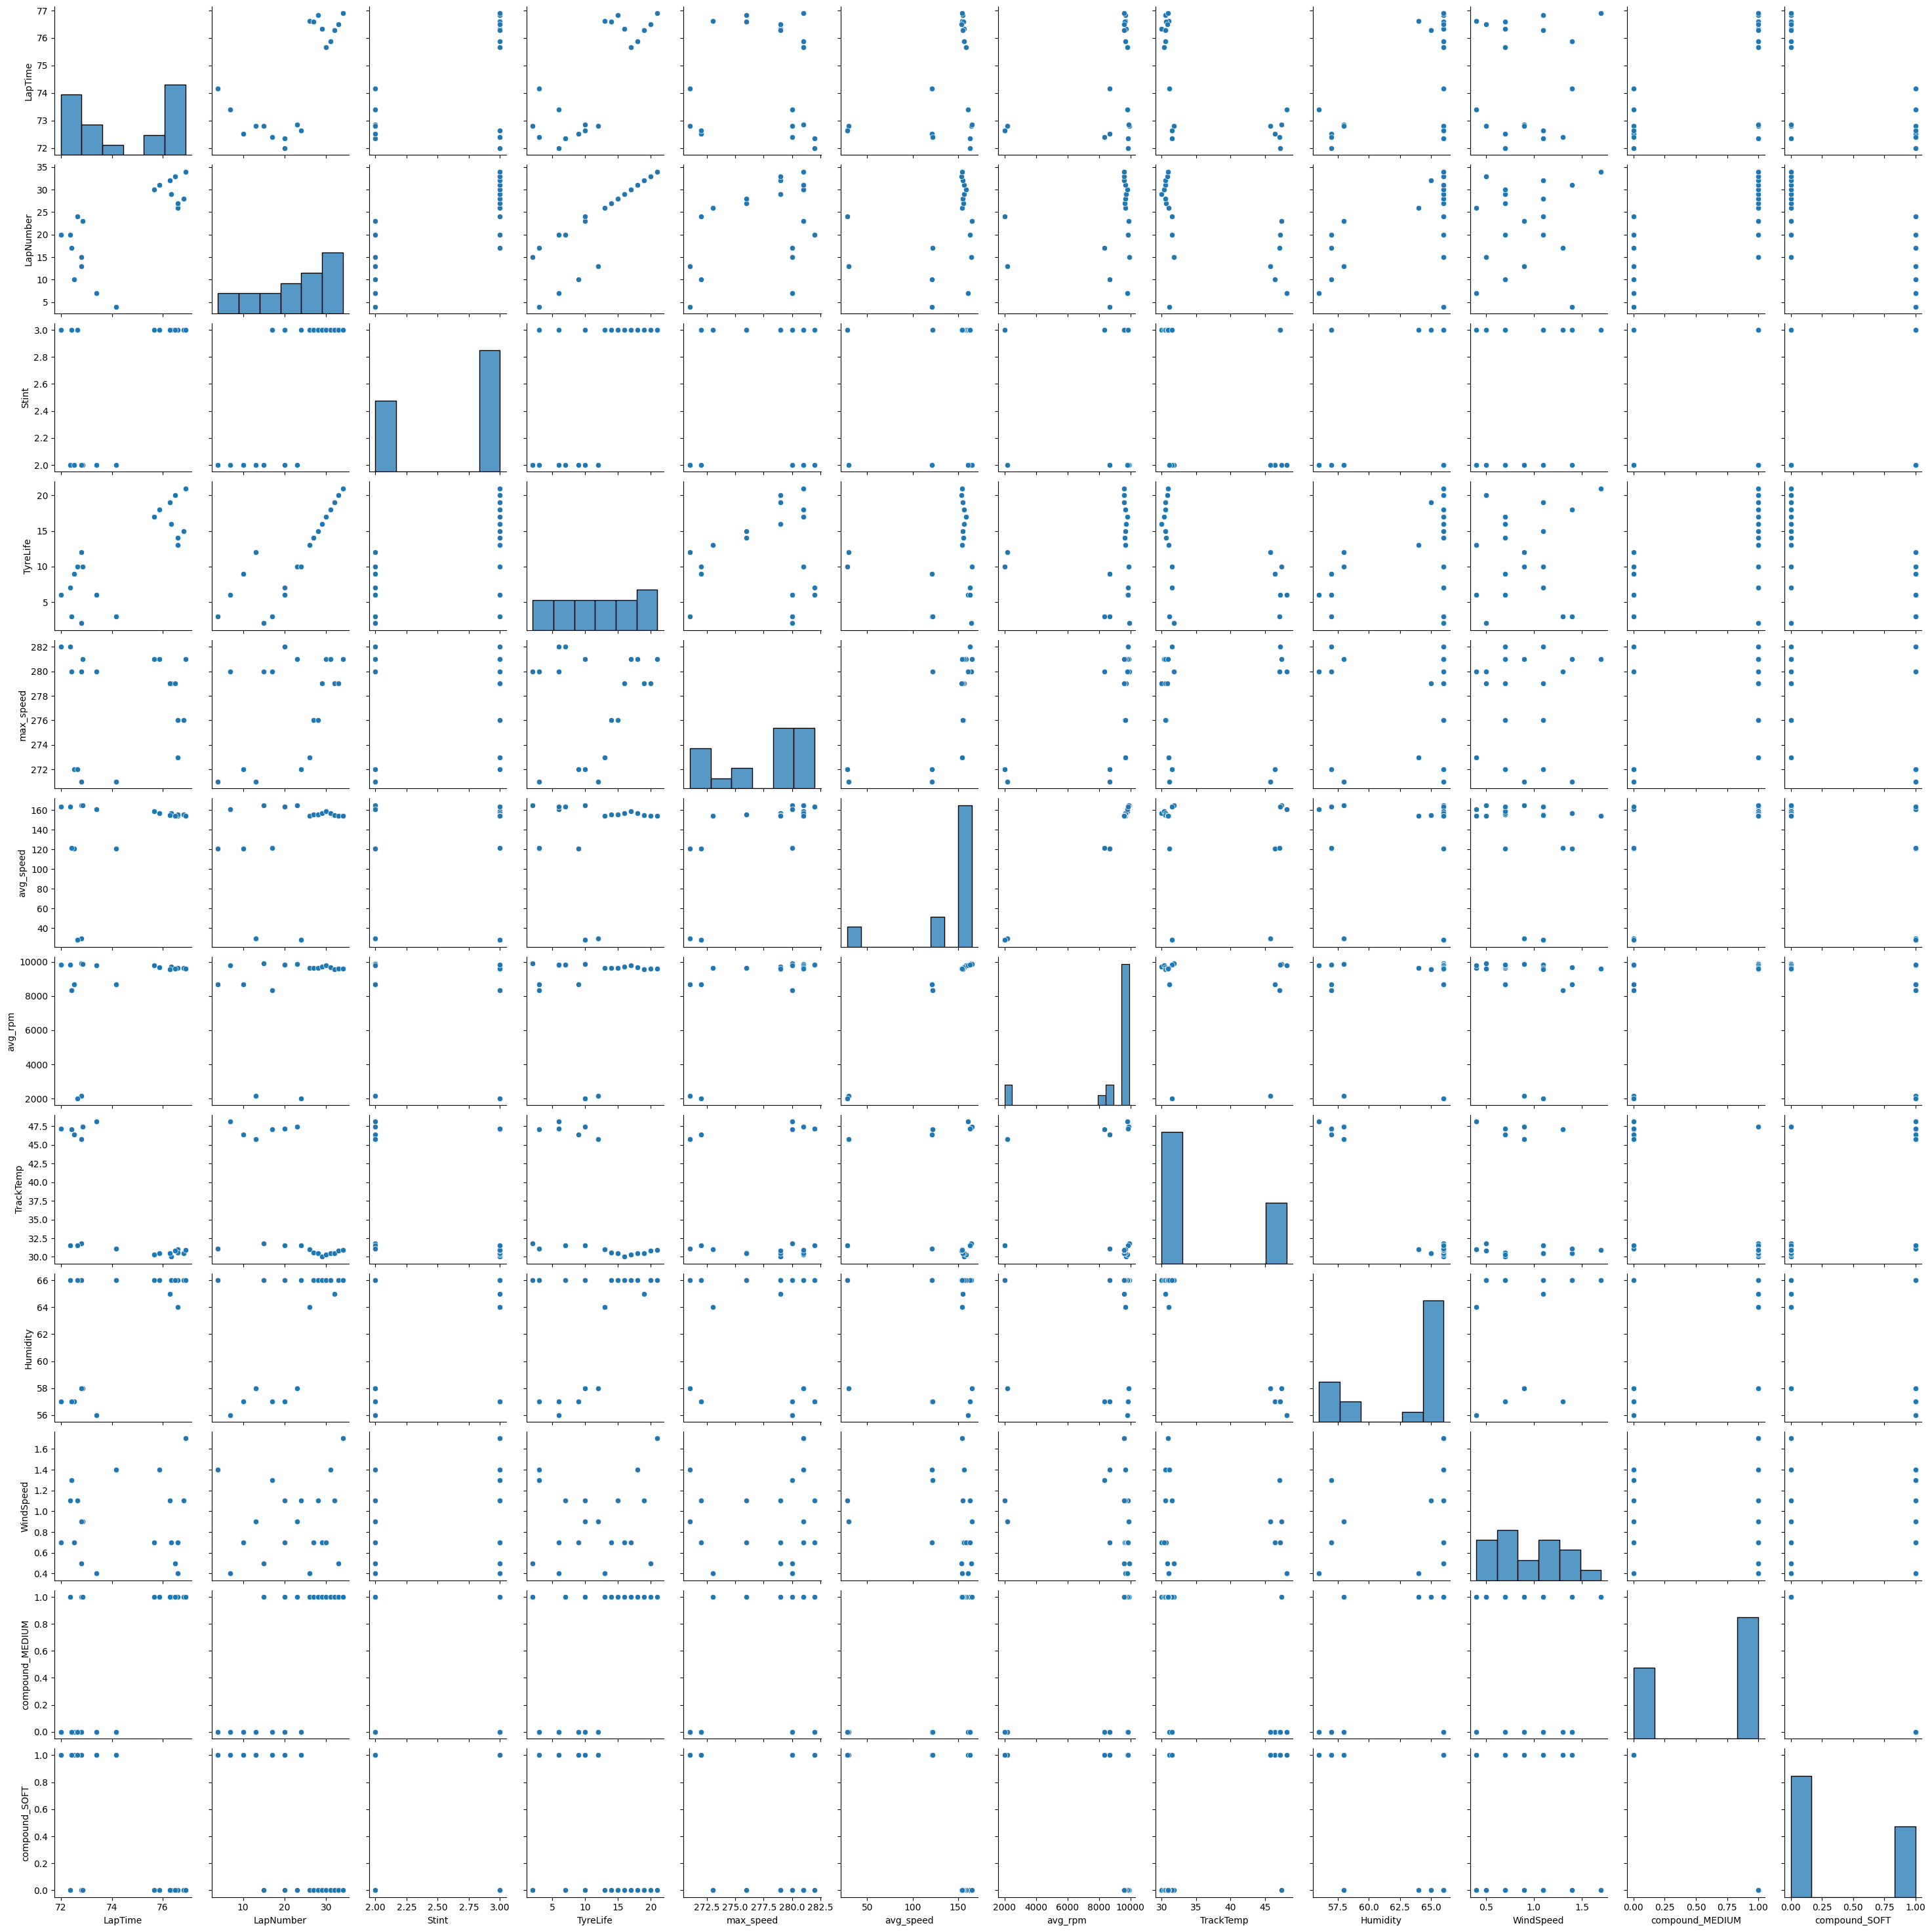

In [44]:
practice_times_encoded['compound_MEDIUM'] = practice_times_encoded['compound_MEDIUM'].astype(int)
practice_times_encoded['compound_SOFT'] = practice_times_encoded['compound_SOFT'].astype(int)

sns.pairplot(practice_times_encoded)

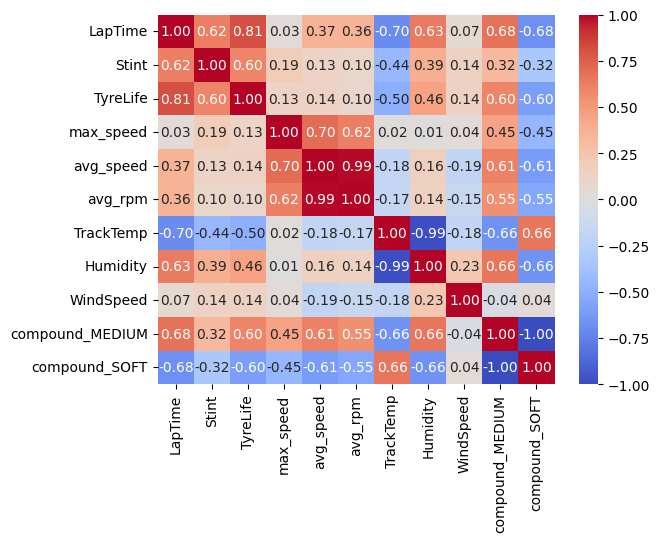

In [45]:

practice_times_encoded = practice_times_encoded.drop(columns=['LapNumber'], axis=1)
# Calculate the correlation matrix
corr_matrix = practice_times_encoded.corr()

# Create a heatmap for the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.savefig('plots/heatmap.png')

In [46]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import xgboost as xgb



X = practice_times_encoded[['TyreLife', 'Stint', 'max_speed', 'avg_speed', 'avg_rpm', 'compound_MEDIUM', 'compound_SOFT', 'TrackTemp']]
y = practice_times_encoded[['LapTime']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror', 
    'max_depth': 6,                   
    'eta': 0.1,                       
    'subsample': 0.8,                  
    'colsample_bytree': 0.8,          
    'eval_metric': 'rmse'}

num_round = 100 
model = xgb.train(params, train_data, num_round, evals=[(test_data, 'eval')])
prediction = model.predict(test_data)

print(f'mean_absolute_error: {mean_absolute_error(y_test, prediction)} seconds.')
print(f'root mean squared error: {root_mean_squared_error(y_test, prediction)} seconds.')
print(f'r2 score : {r2_score(y_test, prediction)}')

[0]	eval-rmse:2.01891
[1]	eval-rmse:1.88678
[2]	eval-rmse:1.76569
[3]	eval-rmse:1.64384
[4]	eval-rmse:1.52921
[5]	eval-rmse:1.46670
[6]	eval-rmse:1.38369
[7]	eval-rmse:1.30090
[8]	eval-rmse:1.23414
[9]	eval-rmse:1.16794
[10]	eval-rmse:1.10057
[11]	eval-rmse:1.04637
[12]	eval-rmse:0.99767
[13]	eval-rmse:0.95768
[14]	eval-rmse:0.92318
[15]	eval-rmse:0.88851
[16]	eval-rmse:0.86773
[17]	eval-rmse:0.83603
[18]	eval-rmse:0.80744
[19]	eval-rmse:0.79556
[20]	eval-rmse:0.77219
[21]	eval-rmse:0.74104
[22]	eval-rmse:0.73283
[23]	eval-rmse:0.71745
[24]	eval-rmse:0.70141
[25]	eval-rmse:0.68468
[26]	eval-rmse:0.66826
[27]	eval-rmse:0.64909
[28]	eval-rmse:0.63296
[29]	eval-rmse:0.61841
[30]	eval-rmse:0.60898
[31]	eval-rmse:0.59534
[32]	eval-rmse:0.58682
[33]	eval-rmse:0.58229
[34]	eval-rmse:0.57095
[35]	eval-rmse:0.56553
[36]	eval-rmse:0.55963
[37]	eval-rmse:0.55401
[38]	eval-rmse:0.55022
[39]	eval-rmse:0.54761
[40]	eval-rmse:0.54297
[41]	eval-rmse:0.53633
[42]	eval-rmse:0.53224
[43]	eval-rmse:0.5264